# 1. Importing Libraries

In [139]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print('CV2 version: ',cv2.__version__)
print('numpy version: ',np.__version__)


CV2 version:  4.2.0
numpy version:  1.16.2


# 2. Functions

In [170]:
#function to select four points on a image to capture desired region
def draw_circle(event,x,y,flags,param):
    global pointIndex
    global pts

    if event == cv2.EVENT_LBUTTONDOWN:
                cv2.circle(img, (x, y), 10, (0, 0, 255), -1)
                pts[pointIndex] = (x,y)
                pointIndex = pointIndex + 1
                
def show_window(img):                       
        while True:
                cv2.imshow('Calibration', img)
                
                if(pointIndex == 4):
                    cv2.waitKey(3000)
                    break
                
                if (cv2.waitKey(20) & 0xFF == 27) :
                        break

# 3. Calibration

In [171]:
## 1. Variables globales para optener parámetros de la Calibración 
pointIndex = 0
pts = [(0,0),(0,0),(0,0),(0,0)]
## 2. Cargamos la imagen para calibración
img_path = "./Calibration_House.jpeg"
img = cv2.imread(img_path)
img_original = img.copy()
IMAGE_H = img.shape[0]
IMAGE_W = img.shape[1]
print('Resolución de la imágen de la cámara (WIDTH, HEIGHT): ',(IMAGE_W,IMAGE_H))

Resolución de la imágen de la cámara (WIDTH, HEIGHT):  (1600, 777)


In [172]:

print('Seleccionar puntos en sentido antihorario')
input('Presionar enter para conitnuar')
cv2.namedWindow('Calibration')
cv2.setMouseCallback('Calibration',draw_circle)
show_window(img)
cv2.destroyAllWindows()

Seleccionar puntos en sentido antihorario
Presionar enter para conitnuar


In [173]:
print(pts)
data = np.asarray(pts,dtype=np.float32)
np.save('data.npy', data)

[(134, 445), (398, 247), (652, 389), (399, 633)]


# 4. Resultado de la Calibracion

In [174]:
source_points = np.load('data.npy')
source_points

array([[134., 445.],
       [398., 247.],
       [652., 389.],
       [399., 633.]], dtype=float32)

### 4.1 Cuadro escogido como referencia

Image size:  (777, 1600, 3)


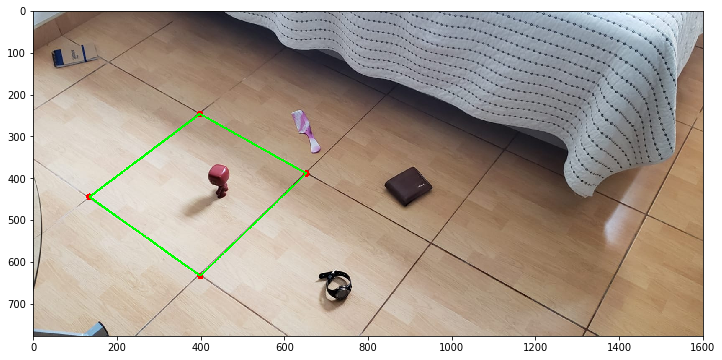

In [175]:
#Seleccionamos manualmente 4 puntos en la imagen. Utilizamos la vereda como referencia.
image_calibration = img_original
#Dibujamos los puntos seleccionados en la imagen:
for point in source_points:
    cv2.circle(image_calibration, tuple(point), 8, (0, 0, 255), -1)

#Dibujamos las líneas de unión entre los puntos para formar el trapecio:
points = source_points.reshape((-1,1,2)).astype(np.int32)
cv2.polylines(image_calibration, [points], True, (0,255,0), thickness=4)

#Graficamos la imagen:
print("Image size: ", img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.show()

### 4.2 Bird eye view

In [176]:
inputQuad = source_points
img = cv2.imread("./Calibration_House.jpeg")
img2 = img.copy()
for point in source_points:
    img2 =cv2.circle(img, tuple(point), 8, (0, 0, 255), -1)
img2 = cv2.polylines(img2, [points], True, (0,255,0), thickness=4)
cv2.imwrite("./" + "input2.jpg",img2)

True

In [177]:
inputQuad = source_points
img = img_original.copy()
#OUTPUT
outputQuad = np.float32([[0,0],[870,0],[870,620],[0,620]])
#outputQuad = np.float32([[0,0],[200,0],[200,200],[0,200]])
IMAGE_H = img.shape[0]
IMAGE_W = img.shape[1]
M = cv2.getPerspectiveTransform(inputQuad,outputQuad)
print('Matriz Homolográfica\n',M)

Matriz Homolográfica
 [[ 1.93706293e+00 -2.73043444e+00  9.55476895e+02]
 [ 1.85871873e+00  2.47829164e+00 -1.35190809e+03]
 [-1.57604675e-05  8.72389836e-04  1.00000000e+00]]


In [180]:
inputQuad = source_points
img = img_original
#img = image_calibration
#OUTPUT
outputQuad = np.float32([[0,0],[870,0],[870,620],[0,620]])
#outputQuad = np.float32([[0,0],[200,0],[200,200],[0,200]])
IMAGE_H = img.shape[0]
IMAGE_W = img.shape[1]
M = cv2.getPerspectiveTransform(inputQuad,outputQuad)

inputCorners = np.float32([[0,0],[IMAGE_W,0],[0,IMAGE_H],[IMAGE_W,IMAGE_H]])
outputCorners = cv2.perspectiveTransform(np.array([inputCorners]),M)
br = cv2.boundingRect(outputCorners)
for i in range(0,4):
    outputQuad[i] = outputQuad[i] -1*np.float32([br[0],br[1]])

M = cv2.getPerspectiveTransform(inputQuad,outputQuad)
size = (br[2],br[3])
output = cv2.warpPerspective(img, M, size)
#output = cv2.resize(output,(1000,1000))
print(size)
cv2.imwrite('./' + "input.jpg",img)
cv2.imwrite('./' + "output.jpg",output)

(4855, 3499)


True

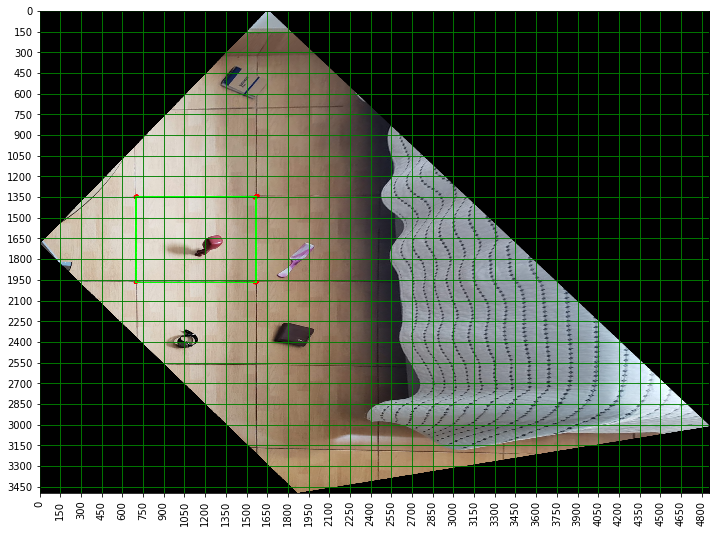

In [181]:
#Graficamos la imagen transformada:
plt.figure(figsize=(12, 12))
plt.imshow( cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.xticks(np.arange(0, output.shape[1], step=150),rotation=90)
plt.yticks(np.arange(0, output.shape[0], step=150))
plt.grid(True, color='g', linestyle='-', linewidth=0.9)
plt.show()